Following this for the Neural networks
https://madewithml.com/courses/foundations/neural-networks/

In [2]:
#importing libraries

import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd


SEED =1234


np.random.seed(SEED)
random.seed(SEED)


In [15]:
#Loading data

url  = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/spiral.csv"

df  =pd.read_csv(url,header=0)



In [16]:
#shuffling the data

df  = df.sample(frac=1).reset_index(drop=True)
df.head(4)

,X1,X2,color
0,0.216604,0.117650,c1
1,-0.027957,-0.015701,c3
2,0.377979,0.060343,c1
3,0.261746,-0.589821,c1


In [18]:
#Data Shapes

X  = df[["X1","X2"]].values
Y = df["color"].values

print(X.shape, Y.shape)



(1500, 2) (1500,)


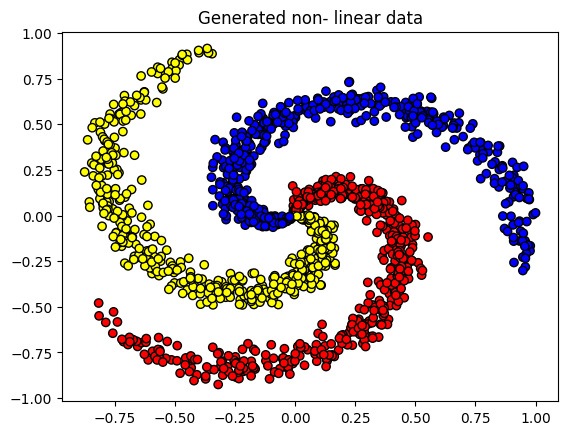

In [21]:
#Visualizing the data
plt.title("Generated non- linear data")
colors = {"c1": "red", "c2": "yellow", "c3": "blue"}

plt.scatter(X[:,0], X[:,1], c=[ colors[_y] for _y in Y], edgecolors= "k")
plt.show()

In [22]:
# Split the data
import collections
from sklearn.model_selection import train_test_split


In [94]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [93]:
def train_val_test_split(X, y, train_size):
    """Split dataset into data splits."""
    X_train, X_, y_train, y_ = train_test_split(X, y, train_size=TRAIN_SIZE, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size=0.5, stratify=y_)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [95]:
# Create data splits
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(
    X=X, y=Y, train_size=TRAIN_SIZE)
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print (f"Sample point: {X_train[0]} → {y_train[0]}")


X_train: (1050, 2), y_train: (1050,)
X_val: (225, 2), y_val: (225,)
X_test: (225, 2), y_test: (225,)
Sample point: [ 0.2603229  -0.57728545] → c1


#Label Encoding

Implementing our own label encoder 

Encode Target text label to nummeric for building the model


In [96]:
import itertools

In [97]:
#Need to define  methods, fit, encode, decode, save and load
import json

class LabelEncoderImpl(object):


    def __init__(self,class_to_index={}) -> None:

        """ Intialize the object """
        self.class_to_index = {} or class_to_index   #Default class from index. 
  
        self.index_to_class = { v:k for k,v in self.class_to_index.items()} #Default indices from the classes

        self.classes_ = list(self.class_to_index.keys())

        pass

    def __len__(self):
        return len(self.class_to_index)

    def __str__(self):
        return f"<LabelEncoder(num_classes={len(self)})>"
    
    def fit(self,y):
        """Fit the encoders from the class labels"""

        classes = np.unique(y)
        for i , j in enumerate(classes):
            self.class_to_index[i] = j

        self.index_to_class = { v:k  for k,v in self.class_to_index.items()}

        self.classes  = list(self.class_to_index.keys())

        return self
        

        
    def encode(self,y):
        """ Given the class values, return the enoded labels"""

        labels = []

        for i ,item in enumerate(y):

            labels[i] = self.class_to_index[item]
        return labels
    
    def decode(self,y):
        """
        Given the encode labels,  return the class
        """
        classes =[]

        for i,j in enumerate(y):
            classes.append(self.index_to_class[j])
            

    def save(self,path):
        """save the encodings to the path """

        with open(path,"wp") as p:
            contents = {'classes_to_index':self.class_to_index}
            json.dumps(contents,p,indent=4,sort_keys=False)

    @classmethod
    def load(cls,path):
        with open(path,"r") as p:
            kwargs=json.load(fp=p)
        return cls(**kwargs)





In [98]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [99]:
# Fit on train data
label_encoder = label_encoder.fit(y_train)
classes = list(label_encoder.classes_)
print (f"classes: {classes}")

classes: ['c1', 'c2', 'c3']


In [100]:
# Convert labels to tokens
print (f"y_train[0]: {y_train[0]}")
y_train = label_encoder.transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)
print (f"y_train[0]: {y_train[0]}")

y_train[0]: c1
y_train[0]: 0


In [101]:
# Class weights
counts = np.bincount(y_train)
class_weights = {i: 1.0/count for i, count in enumerate(counts)}
print (f"counts: {counts}\nweights: {class_weights}")

counts: [350 350 350]
weights: {0: 0.002857142857142857, 1: 0.002857142857142857, 2: 0.002857142857142857}


In [115]:
#Standardize the data
from sklearn.preprocessing import StandardScaler

# Standardize the data (mean=0, std=1) using training data
X_scaler = StandardScaler().fit(X_train)


# Apply scaler on training and test data (don't standardize outputs for classification)
X_train = X_scaler.transform(X_train)
X_val = X_scaler.transform(X_val)
X_test = X_scaler.transform(X_test)


# Check (means should be ~0 and std should be ~1)
print (f"X_test[0]: mean: {np.mean(X_test[:, 0], axis=0):.1f}, std: {np.std(X_test[:, 0], axis=0):.1f}")
print (f"X_test[1]: mean: {np.mean(X_test[:, 1], axis=0):.1f}, std: {np.std(X_test[:, 1], axis=0):.1f}")


X_test[0]: mean: -0.0, std: 1.0
X_test[1]: mean: 0.0, std: 1.0


# Linear model

Before we get to our neural network, we're going to motivate non-linear activation functions by implementing a generalized linear model (logistic regression). We'll see why linear models (with linear activations) won't suffice for our dataset.

In [103]:
import torch
torch.manual_seed(SEED)


from torch import nn
import torch.nn.functional as F


In [116]:
#Shapes for model training

INPUT_DIM = X_train.shape[1]
# print(INPUT_DIM) 

# # nn.Linear expects the value as int so we'll do

# INPUT_DIM = INPUT_DIM[1]
# print(INPUT_DIM) #2


In [117]:
HIDDEN_DIMS = 100
OUTPUT_DIMS = len(classes) #3 classes, again an int

In [106]:
class LinearModel(nn.Module):
    
    def __init__(self,input_dim,hidden_dim,num_classes) -> None:
        super().__init__()
        self.fc1 = nn.Linear(input_dim,hidden_dim)
        self.fc2 = nn.Linear(hidden_dim,num_classes)


    def forward(self,x_in):
        z=self.fc1(x_in) # Linear activations/ No Activation
        z= self.fc2(z)
        return z



In [107]:
# Initialize model
model = LinearModel(input_dim=INPUT_DIM, hidden_dim=HIDDEN_DIMS, num_classes=OUTPUT_DIMS)
print (model.named_parameters)

<bound method Module.named_parameters of LinearModel(
  (fc1): Linear(in_features=2, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=3, bias=True)
)>


TRANING

In [108]:
from torch.optim import Adam


LEARNING_RATE = 1e-2
NUM_EPOCHS = 10
BATCH_SIZE = 32

In [109]:
class_weights.values()

dict_values([0.002857142857142857, 0.002857142857142857, 0.002857142857142857])

In [110]:
#Define Loss with class balance
# Note that Cross Entropy accepts weught in tensor format so

class_weights_tensors = torch.Tensor(list(class_weights.values()))  

loss_fn = nn.CrossEntropyLoss(weight=class_weights_tensors)

In [111]:
# Accuracy
def accuracy_fn(y_pred, y_true):
    n_correct = torch.eq(y_pred, y_true).sum().item() #????? Did this probably because input will be tensors
    accuracy = (n_correct / len(y_pred)) * 100
    return accuracy

In [112]:
# Optimizer
optimizer = Adam(model.parameters(), lr=LEARNING_RATE)


In [120]:
# Convert data to tensors
X_train = torch.Tensor(X_train)
y_train = torch.LongTensor(y_train)
X_val = torch.Tensor(X_val)
y_val = torch.LongTensor(y_val)
X_test = torch.Tensor(X_test)
y_test = torch.LongTensor(y_test)


In [122]:
#Training 
for epoch in range(NUM_EPOCHS):

    y_pred = model(X_train)


    assert type(y_pred)==type(torch.Tensor()),"Type not matched"

    #once we have the predictions we can calculate the loss
    loss  =loss_fn(y_pred,y_train)


    # Zero all gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    if epoch%1==0:
        predictions = y_pred.max(dim=1)[1] # class
        accuracy = accuracy_fn(y_pred=predictions, y_true=y_train)
        print (f"Epoch: {epoch} | loss: {loss:.2f}, accuracy: {accuracy:.1f}")



Epoch: 0 | loss: 0.79, accuracy: 53.8
Epoch: 1 | loss: 0.79, accuracy: 54.2
Epoch: 2 | loss: 0.79, accuracy: 54.5
Epoch: 3 | loss: 0.78, accuracy: 54.5
Epoch: 4 | loss: 0.78, accuracy: 54.8
Epoch: 5 | loss: 0.77, accuracy: 54.8
Epoch: 6 | loss: 0.77, accuracy: 54.8
Epoch: 7 | loss: 0.76, accuracy: 54.2
Epoch: 8 | loss: 0.76, accuracy: 53.8
Epoch: 9 | loss: 0.76, accuracy: 54.1


# Evaluation

In [123]:
import json
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support


In [124]:
def get_metrics(y_true, y_pred, classes):
    """Per-class performance metrics."""
    # Performance
    performance = {"overall": {}, "class": {}}

    # Overall performance
    metrics = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    performance["overall"]["precision"] = metrics[0]
    performance["overall"]["recall"] = metrics[1]
    performance["overall"]["f1"] = metrics[2]
    performance["overall"]["num_samples"] = np.float64(len(y_true))

    # Per-class performance
    metrics = precision_recall_fscore_support(y_true, y_pred, average=None)
    for i in range(len(classes)):
        performance["class"][classes[i]] = {
            "precision": metrics[0][i],
            "recall": metrics[1][i],
            "f1": metrics[2][i],
            "num_samples": np.float64(metrics[3][i]),
        }

    return performance


In [125]:
# Predictions
y_prob = F.softmax(model(X_test), dim=1)
print (f"sample probability: {y_prob[0]}")
y_pred = y_prob.max(dim=1)[1]
print (f"sample class: {y_pred[0]}")


sample probability: tensor([0.5098, 0.3073, 0.1829], grad_fn=<SelectBackward0>)
sample class: 0


In [126]:
# # Performance
performance = get_metrics(y_true=y_test, y_pred=y_pred, classes=classes)
print (json.dumps(performance, indent=2))


{
  "overall": {
    "precision": 0.505647764773607,
    "recall": 0.5066666666666667,
    "f1": 0.505418393076621,
    "num_samples": 225.0
  },
  "class": {
    "c1": {
      "precision": 0.5060240963855421,
      "recall": 0.56,
      "f1": 0.5316455696202531,
      "num_samples": 75.0
    },
    "c2": {
      "precision": 0.4492753623188406,
      "recall": 0.41333333333333333,
      "f1": 0.4305555555555556,
      "num_samples": 75.0
    },
    "c3": {
      "precision": 0.5616438356164384,
      "recall": 0.5466666666666666,
      "f1": 0.5540540540540541,
      "num_samples": 75.0
    }
  }
}


In [127]:
def plot_multiclass_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))
    cmap = plt.cm.Spectral

    X_test = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
    y_pred = F.softmax(model(X_test), dim=1)
    _, y_pred = y_pred.max(dim=1)
    y_pred = y_pred.reshape(xx.shape)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


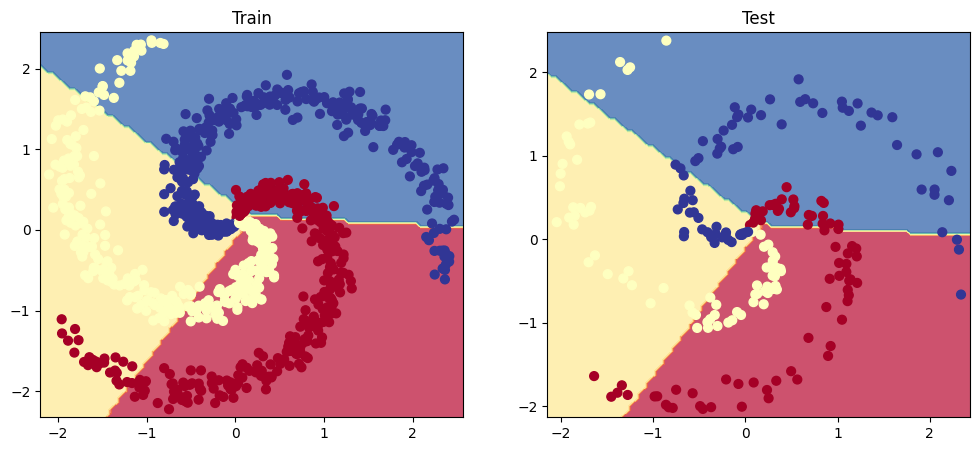

In [128]:
# Visualize the decision boundary
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_multiclass_decision_boundary(model=model, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_multiclass_decision_boundary(model=model, X=X_test, y=y_test)
plt.show()


### Activation functions

Using the generalized linear method (logistic regression) yielded poor results because of the non-linearity present in our data yet our activation functions were linear. We need to use an activation function that can allow our model to learn and map the non-linearity in our data. There are many different options so let's explore a few.

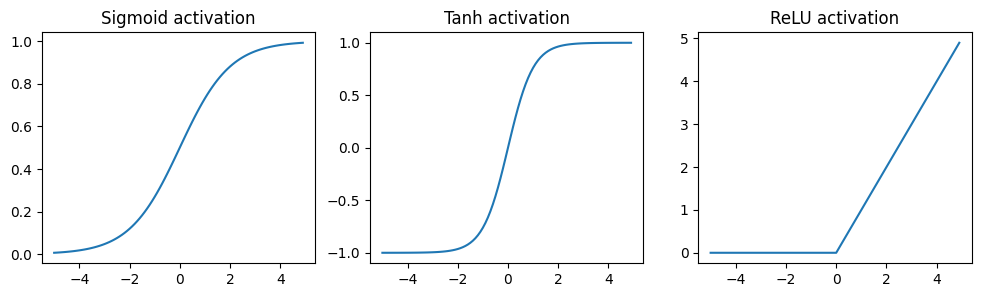

In [129]:
# Fig size
plt.figure(figsize=(12,3))

# Data
x = torch.arange(-5., 5., 0.1)

# Sigmoid activation (constrain a value between 0 and 1.)
plt.subplot(1, 3, 1)
plt.title("Sigmoid activation")
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())

# Tanh activation (constrain a value between -1 and 1.)
plt.subplot(1, 3, 2)
y = torch.tanh(x)
plt.title("Tanh activation")
plt.plot(x.numpy(), y.numpy())

# Relu (clip the negative values to 0)
plt.subplot(1, 3, 3)
y = F.relu(x)
plt.title("ReLU activation")
plt.plot(x.numpy(), y.numpy())

# Show plots
plt.show()


# NumPy

Now let's create our multilayer perceptron (MLP) which is going to be exactly like the logistic regression model but with the activation function to map the non-linearity in our data.